### Inicialização Dados

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt

In [7]:
# Importando o dataset
# -----------------------------------------------------

df = pd.read_csv('./healthcare-dataset-stroke-data.csv',sep=",") 

In [8]:
# Dados Indisponíveis
# -----------------------------------------------------

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Feature Mapping

In [9]:
df.gender = df.gender.replace({'Male':0,'Female':1,'Other':-1})
df.ever_married = df.ever_married.replace({'Yes':1,'No':0})
df.work_type = df.work_type.replace({'Self-employed':0,'Private':1,'Govt_job':2,'children':3, 'Never_worked':4})
df.Residence_type = df.Residence_type.replace({'Rural':1,'Urban':0})
df.smoking_status = df.smoking_status.replace({'smokes':1,'never smoked':0, 'formerly smoked':-1, 'Unknown': -2})

### Dados Faltantes BMI

#### Aplicando Regressao Linear para prever os dados faltantes de BMI

<Axes: >

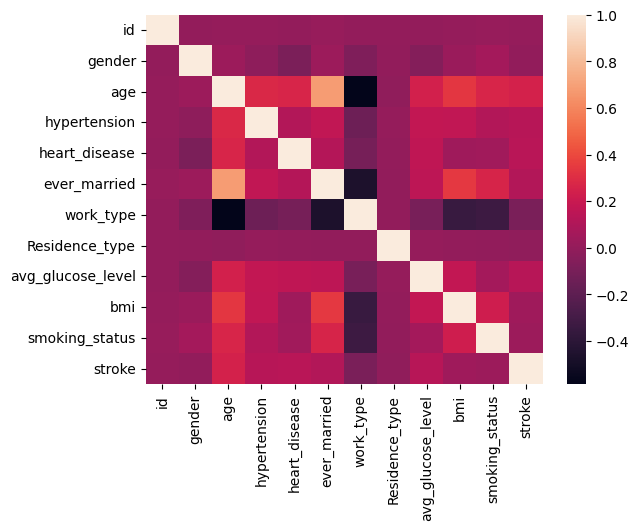

In [10]:
# Gráfico de calor (Heatmap)
df.corr()
sns.heatmap(df.corr())

In [11]:
# Selecionando as variáveis explanatórias para o modelo (conjunto X)
#Filtrado apenas as linhas com BMI != NaN para treinamento do modelo
filteredDF = df[~df.bmi.isna()]

# age e ever_married parece, os mais promissores pois a correlação é maior
X = filteredDF[['age']]
# Selecionando a variável dependente (target) para o modelo (conjunto Y)
Y = filteredDF[['bmi']]

ccof = df['age'].corr(df['bmi'])
print(f'ccof (r):{ccof}')

ccof (r):0.33339799516043944


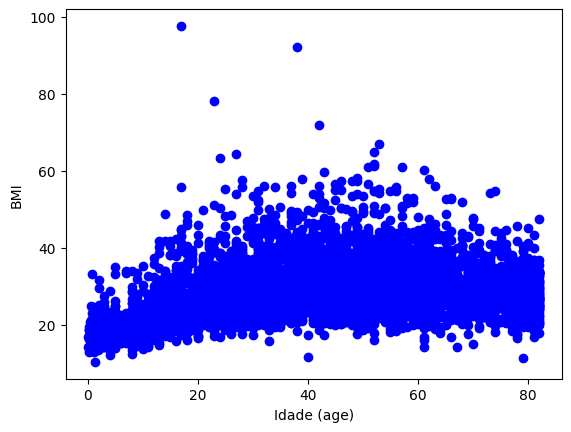

In [12]:
# Gráfico de Dispersão
plt.scatter(filteredDF[['age']], Y,  color='blue')
plt.xlabel('Idade (age)')
plt.ylabel('BMI')
plt.show()

In [14]:
# Decision Tree - Modeling
# --------------------------------------------------
model = LinearRegression()
model.fit(X,Y)


# Cálculo do Coeficiente de Determinação R2 (quanto mais próximo de 1, melhor o modelo!)
print('Coeficiente de Determinação:', model.score(X, Y))


# Admitindo a Equação da Regressão Linear: 𝑓(𝑥) = 𝑏₀ + 𝑏₁𝑥
print('b0 ou intercept:', model.intercept_)
print('b1 ou coeficiente (slope):', model.coef_)


# Aplicando o modelo construído nos dados (conjunto X)
predictions = model.predict(X)


# Cálculo de MSE (Mean Squared Error), MAE (Mean Absolute Error) e RMSE (Root Mean Square Error)
print('MAE:', metrics.mean_absolute_error(Y, predictions))
print('MSE:', metrics.mean_squared_error(Y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y, predictions)))

Coeficiente de Determinação: 0.11115422317700019
b0 ou intercept: [23.91679268]
b1 ou coeficiente (slope): [[0.11609474]]
MAE: 5.56006354220887
MSE: 54.81849508911304
RMSE: 7.403951315960488


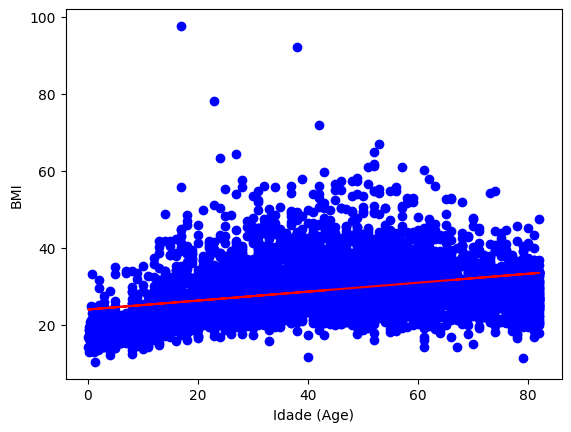

In [15]:
# Conjunto X, neste exemplo, somente "AGE"
# --------------------------------------------------

plt.scatter(X, Y, color='blue')
plt.plot(X, model.predict(X), color='red')
plt.xlabel('Idade (Age)')
plt.ylabel('BMI')

plt.show()

In [16]:
# Comparando o Real X Previsto
# --------------------------------------------------
pred = [ '%.2f' % elem for elem in predictions ]
y = filteredDF['bmi']

data = list(zip(y,pred))

resultado = pd.DataFrame(data, columns=['Real','Previsto'])
resultado

/var/folders/9b/l7mbh9g57cq0rg8g7kr49x2w0000gp/T/ipykernel_49853/483146857.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred = [ '%.2f' % elem for elem in predictions ]


Real Previsto
0     36.6    31.70
1     32.5    33.20
2     34.4    29.61
3     24.0    33.09
4     29.0    33.32
...    ...      ...
4904  18.6    25.43
4905  40.0    33.32
4906  30.6    27.98
4907  25.6    29.84
4908  26.2    29.02

[4909 rows x 2 columns]

In [17]:
# Utilizando os dados do modelo para predizer os valores vazios de BMI baseados em AGE

toPredict = df[df.bmi.isna()].copy()['age'] # Copiando apenas os dados de AGE dos valores com BMI == NaN

newPredictions = []

# Predizendo os valores de BMI
for age in toPredict:
    newPredictions.append((model.intercept_ + model.coef_* age))


bmi_empty = df[df.bmi.isna()] # Criado dataframe apenas com BMI === NaN (201 linhas)
bmi_empty['bmi'] = newPredictions # adicionamos a coluna predicted BMI ao dataframe de teste
dfWithoutBMI = df[~df.bmi.isna()] # filtrando apenas as linhas sem NaN do DF principal

bmi_empty = bmi_empty.explode('bmi').explode('bmi')
predictedDataframe = pd.concat([bmi_empty, dfWithoutBMI]) # concatenando os DF (4909 + 201)

predictedDataframe # Dataframe completo

/var/folders/9b/l7mbh9g57cq0rg8g7kr49x2w0000gp/T/ipykernel_49853/2294507010.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_empty['bmi'] = newPredictions # adicionamos a coluna predicted BMI ao dataframe de teste


id  gender   age  hypertension  heart_disease  ever_married  \
1     51676       1  61.0             0              0             1   
8     27419       1  59.0             0              0             1   
13     8213       0  78.0             0              1             1   
19    25226       0  57.0             0              1             0   
27    61843       0  58.0             0              0             1   
...     ...     ...   ...           ...            ...           ...   
5104  14180       1  13.0             0              0             0   
5106  44873       1  81.0             0              0             1   
5107  19723       1  35.0             0              0             1   
5108  37544       0  51.0             0              0             1   
5109  44679       1  44.0             0              0             1   

      work_type  Residence_type  avg_glucose_level        bmi  smoking_status  \
1             0               1             202.21  30.998572               0   
8             1               1              76.15  30.766382              -2   
13            1               0             219.84  32.972182              -2   
19            2               0             217.08  30.534193              -2   
27            1               1             189.84  30.650287              -2   
...         ...             ...                ...        ...             ...   
5104          3               1             103.08       18.6              -2   
5106          0               0             125.20       40.0               0   
5107          0               1              82.99       30.6               0   
5108          1               1             166.29       25.6              -1   
5109          2               0              85.28       26.2              -2   

      stroke  
1          1  
8          1  
13         1  
19         1  
27         1  
...      ...  
5104       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [18]:
predictedDataframe.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Aplicando Árvore de decisão para prever os dados faltantes de BMI

In [ ]:
# Decision Tree - Data Preparation - BMI
# --------------------------------------------------

# Feature Mapping - BMI

features = ['age','gender', 'heart_disease', 'avg_glucose_level']

X_train = df[['age','gender','bmi','heart_disease', 'avg_glucose_level']].copy() # Selecionado parametros
Y_train = df[['bmi']].copy() # Selecionado BMI como target

Y_train = Y_train[~Y_train.bmi.isna()] #Filtrado apenas as linhas com BMI != NaN
X_train = X_train[~X_train.bmi.isna()] #Filtrado apenas as linhas com BMI != NaN

X_train = X_train.drop(columns=['bmi']) #Apos usar a coluna BMI como filtro, removemos ela dos nossos parametros

Y_train['bmi'] = Y_train['bmi'].astype(int) #Transformado o BMI em inteiro pois o target nao pode ser FLOAT

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=1) #Aplicando a técnica de "Percentage Split"

In [ ]:
decisionTreeClassifier = DecisionTreeClassifier(criterion='entropy') # declarado nosso modelo

decisionTreeClassifier = decisionTreeClassifier.fit(X_train, Y_train) # treinando o modelo baseado nas linhas com BMI != NaN (4909 linhas)

bmi_empty = df[df.bmi.isna()] # Criado dataframe apenas com BMI === NaN (201 linhas)

filteredTestData = bmi_empty[features] # filtrei apenas as colunas que sao parametros

Y_pred = decisionTreeClassifier.predict(X_test)

In [ ]:
# Decision Tree - Aplicando Arvore de decisao para predizer os dados faltantes de BMI
# --------------------------------------------------

predictedBMI = decisionTreeClassifier.predict(filteredTestData) # Fizemos o predict dos dados de BMI
bmi_empty['bmi'] = predictedBMI.tolist() # adicionamos a coluna predicted BMI ao dataframe de teste
dfWithoutBMI = df[~df.bmi.isna()] # filtrando apenas as linhas sem NaN do DF principal
predictedDataframe = pd.concat([bmi_empty, dfWithoutBMI]) # concatenando os DF (4909 + 201)
predictedDataframe

/var/folders/9b/l7mbh9g57cq0rg8g7kr49x2w0000gp/T/ipykernel_49759/1529320851.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_empty['bmi'] = predictedBMI.tolist() # adicionamos a coluna predicted BMI ao dataframe de teste


id  gender   age  hypertension  heart_disease  ever_married  \
1     51676       1  61.0             0              0             1   
8     27419       1  59.0             0              0             1   
13     8213       0  78.0             0              1             1   
19    25226       0  57.0             0              1             0   
27    61843       0  58.0             0              0             1   
...     ...     ...   ...           ...            ...           ...   
5104  14180       1  13.0             0              0             0   
5106  44873       1  81.0             0              0             1   
5107  19723       1  35.0             0              0             1   
5108  37544       0  51.0             0              0             1   
5109  44679       1  44.0             0              0             1   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  \
1             0               1             202.21  33.0               0   
8             1               1              76.15  23.0              -2   
13            1               0             219.84  30.0              -2   
19            2               0             217.08  28.0              -2   
27            1               1             189.84  27.0              -2   
...         ...             ...                ...   ...             ...   
5104          3               1             103.08  18.6              -2   
5106          0               0             125.20  40.0               0   
5107          0               1              82.99  30.6               0   
5108          1               1             166.29  25.6              -1   
5109          2               0              85.28  26.2              -2   

      stroke  
1          1  
8          1  
13         1  
19         1  
27         1  
...      ...  
5104       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 12 columns]

In [ ]:
predictedDataframe.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Acurácia: 0.04


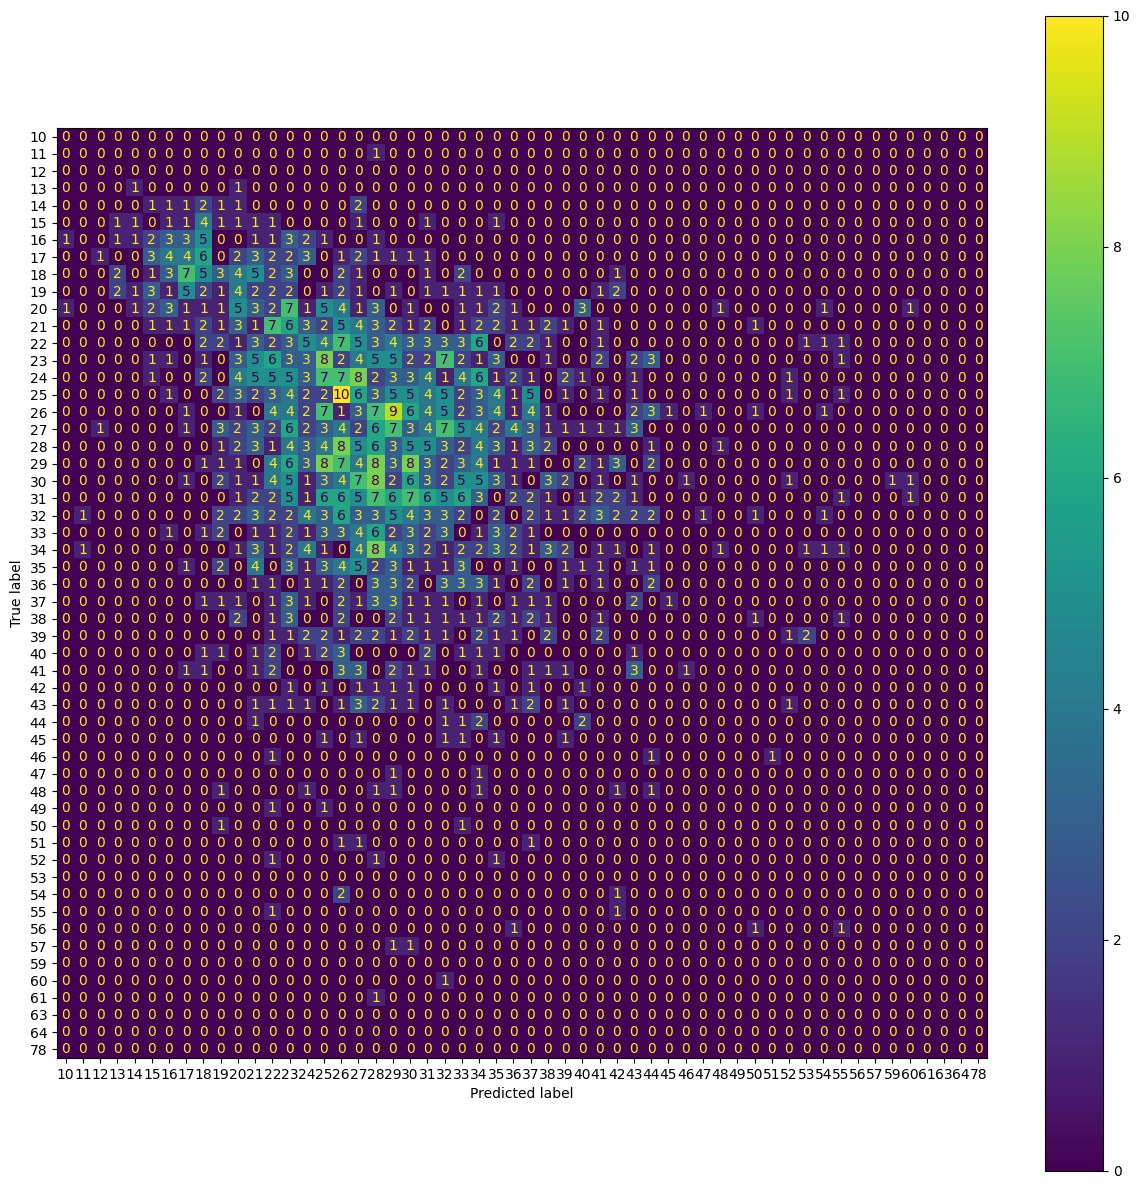

In [ ]:
# Decision Tree - Stroke - Evaluation
# --------------------------------------------------

accuracy = metrics.accuracy_score(Y_pred, Y_test)
accuracy
print('Acurácia: {:.2f}'.format(accuracy))

cm = confusion_matrix(Y_test, Y_pred, labels=decisionTreeClassifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decisionTreeClassifier.classes_)

fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)

### Aplicando Árvore de decisão para prever os dados de STROKE (Derrame cerebral)

In [23]:
# Decision Tree - Modeling - Stroke
# --------------------------------------------------

X_train = predictedDataframe[['age','gender','bmi','heart_disease', 'avg_glucose_level', 'bmi']].copy() # Selecionado parametros
#X_train = predictedDataframe[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type', 'avg_glucose_level', 'bmi','smoking_status']].copy() # Selecionado parametros
Y_train = predictedDataframe[['stroke']].copy() # Selecionado BMI como target

X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=1) #Aplicando a técnica de “Percentage Split

clf = DecisionTreeClassifier(criterion='entropy') # declarado nosso modelo
clf.fit(X_train, Y_train) # treinando o modelo baseado nas linhas com BMI != NaN (4909 linhas)

Y_pred = clf.predict(X_test)

Acurácia: 0.91


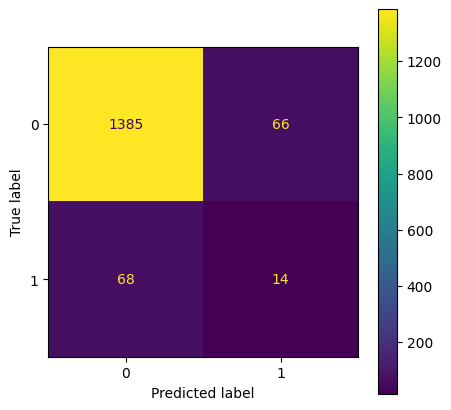

In [25]:
# Decision Tree - Stroke - Evaluation
# --------------------------------------------------

accuracy = metrics.accuracy_score(Y_pred, Y_test)
accuracy
print('Acurácia: {:.2f}'.format(accuracy))

cm = confusion_matrix(Y_test, Y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

fig, ax = plt.subplots(figsize=(5,5))
disp.plot(ax=ax)

In [34]:
# Contando os nós e folhas da árvore
# ---------------------------------

from sklearn.tree import _tree

def contar_nos_e_folhas(arvore):
    nos = 0
    folhas = 0

    # Percorra a estrutura da árvore
    def contar_nos_e_folhas_recursivamente(no):
        nonlocal nos, folhas

        nos += 1
        if arvore.children_left[no] == _tree.TREE_LEAF:
            folhas += 1
        else:
            # Continue recursivamente para os nós filhos
            contar_nos_e_folhas_recursivamente(arvore.children_left[no])
            contar_nos_e_folhas_recursivamente(arvore.children_right[no])

    # Comece a contagem a partir da raiz
    contar_nos_e_folhas_recursivamente(0)

    return nos, folhas

quantidade_de_nos, quantidade_de_folhas = contar_nos_e_folhas(clf.tree_)

print(f"Quantidade de nós na árvore: {quantidade_de_nos}")
print(f"Quantidade de folhas na árvore: {quantidade_de_folhas}")


Quantidade de nós na árvore: 545
Quantidade de folhas na árvore: 273


In [37]:
# Plotando a Arvore de decisão
# ---------------------------------
from sklearn import tree
from matplotlib import pyplot as plt
plt.figure(figsize=(15,15))
classes = []
for cl in clf.classes_:
    classes.append(str(cl))
_ = tree.plot_tree(clf, feature_names=X_train.columns.tolist(),class_names=classes, filled=True)